In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams

In [ ]:
df = pd.read_csv('carsales.csv')
df.shape
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [ ]:
date = pd.date_range(start='1/1/2001', end='12/31/2003', freq='M')
date

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31', '2001-11-30', '2001-12-31',
               '2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30',
               '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31',
               '2002-09-30', '2002-10-31', '2002-11-30', '2002-12-31',
               '2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31',
               '2003-09-30', '2003-10-31', '2003-11-30', '2003-12-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['Date'])
df.head()
df.tail()

,Month,Sales,Time_Stamp
31,3-08,407.6,2003-08-31
32,3-09,682.0,2003-09-30
33,3-10,475.3,2003-10-31
34,3-11,581.3,2003-11-30
35,3-12,646.9,2003-12-31


In [ ]:
df = df.set_index('Time_Stamp')
df.head()
df_final = df.drop(['Month'], axis=1)
df_final.head()

,Sales
Time_Stamp,
2001-01-31,266.0
2001-02-28,145.9
2001-03-31,183.1
2001-04-30,119.3
2001-05-31,180.3


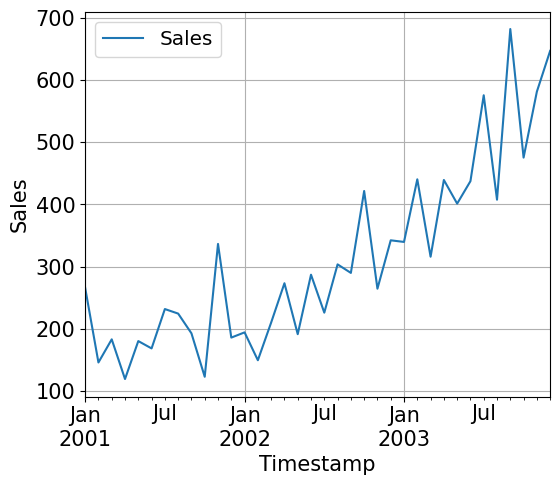

In [ ]:
#Plotting the time-series
df_final.plot(figsize=(6,5))
plt.grid();
plt.xlabel('Timestamp',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

In [ ]:
df_final.isnull().sum()

Sales    0
dtype: int64

In [ ]:
round(df_final.describe(),3)

,Sales
count,36.000
mean,312.600
std,148.937
min,119.300
25%,192.450
50%,280.150
75%,411.100
max,682.000


In [ ]:
monthly_sales_across_years = pd.pivot_table(df_final, values = 'Sales', columns = df_final.index.month_name(), index = df_final.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
2001,119.3,224.5,185.9,145.9,266.0,231.8,168.5,183.1,180.3,336.5,122.9,192.8
2002,273.3,303.6,342.3,149.5,194.3,226.0,287.0,210.1,191.4,264.5,421.6,289.9
2003,439.3,407.6,646.9,440.4,339.7,575.5,437.4,315.9,401.3,581.3,475.3,682.0


In [ ]:
train    =   df_final[0:int(len(df)*0.7)]
test     =   df_final[int(len(df)*0.7):]

Linearregression

In [ ]:
#linear regression
train_time = [i+1 for i in range(len(train))]
test_time = [i+26 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
Test Time instance 
 [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


In [ ]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sales  time
Time_Stamp             
2001-01-31  266.0     1
2001-02-28  145.9     2
2001-03-31  183.1     3
2001-04-30  119.3     4
2001-05-31  180.3     5 

Last few rows of Training Data 
             Sales  time
Time_Stamp             
2002-09-30  289.9    21
2002-10-31  421.6    22
2002-11-30  264.5    23
2002-12-31  342.3    24
2003-01-31  339.7    25 

First few rows of Test Data 
             Sales  time
Time_Stamp             
2003-02-28  440.4    26
2003-03-31  315.9    27
2003-04-30  439.3    28
2003-05-31  401.3    29
2003-06-30  437.4    30 

Last few rows of Test Data 
             Sales  time
Time_Stamp             
2003-08-31  407.6    32
2003-09-30  682.0    33
2003-10-31  475.3    34
2003-11-30  581.3    35
2003-12-31  646.9    36 



In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'].values)

LinearRegression()

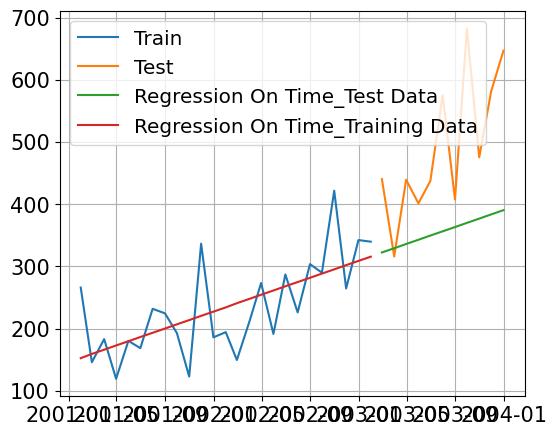

In [ ]:
train_predictions_model1= lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1= lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(6,5))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(fontsize="x-large")
plt.grid();

In [ ]:
#function for calculating the accuracy
from sklearn import metrics
## Mean Absolute Percentage Error - Function Definition
def MAPE(y, yhat):
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [ ]:
# Training Data - RMSE and MAPE
rmse_model1_train = metrics.mean_squared_error(train['Sales'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Sales'],train_predictions_model1)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For RegressionOnTime forecast on the Training Data,  RMSE is 56.962 MAPE is 19.00


In [ ]:
# Test Data - RMSE and MAPE
rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Sales'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 164.563 MAPE is 27.94


In [ ]:
#Evaluation
resultsDf = pd.DataFrame({'Model': 'RegressionOnTime',
                                                    'Test RMSE': [rmse_model1_test],
                          'Test MAPE': [mape_model1_test]},
                         index=['Model 1'])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,164.563291,27.94


Naïve Bayes Classification

In [ ]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [ ]:
NaiveModel_test['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_test['naive'].head()
NaiveModel_train['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_train['naive'].head()

Time_Stamp
2001-01-31    339.7
2001-02-28    339.7
2001-03-31    339.7
2001-04-30    339.7
2001-05-31    339.7
Name: naive, dtype: float64

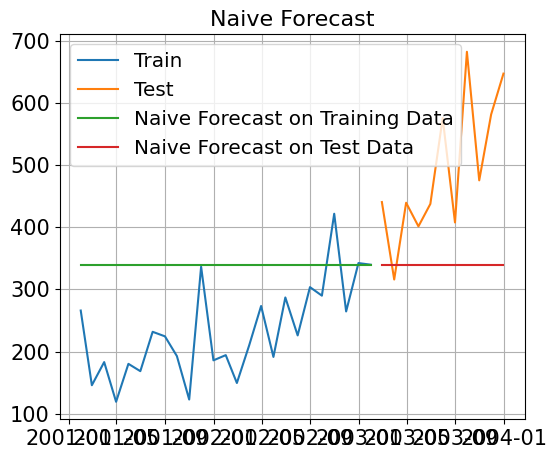

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(NaiveModel_train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['axes.titlesize'] = 8
plt.legend(fontsize="x-large")
plt.grid();

In [ ]:
# Assuming you have a threshold to classify forecasted values as positive or negative
threshold = 0  # Adjust this threshold as needed
from sklearn.metrics import f1_score, recall_score, accuracy_score
# Convert forecasted values to binary classes based on the threshold
naive_forecast_binary = np.where(NaiveModel_test['naive'] > threshold, 1, 0)

# Convert actual sales values to binary classes (e.g., 1 if actual value > previous value, else 0)
actual_sales_binary = np.where(test['Sales'] > test['Sales'].shift(1), 1, 0)

# Calculate F1-score
f1 = f1_score(actual_sales_binary, naive_forecast_binary)

# Calculate recall
recall = recall_score(actual_sales_binary, naive_forecast_binary)

# Calculate accuracy
accuracy = accuracy_score(actual_sales_binary, naive_forecast_binary)

print("F1-score:", f1)
print("Recall:", recall)
print("Accuracy:", accuracy)

F1-score: 0.7058823529411764
Recall: 1.0
Accuracy: 0.5454545454545454


In [ ]:
#Evaluation
## Training Data - RMSE and MAPE
rmse_model2_train = metrics.mean_squared_error(train['Sales'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Sales'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

For Naive Model forecast on the Training Data,  RMSE is 129.667 MAPE is 48.04


In [ ]:
## Test Data - RMSE and MAPE
rmse_model2_test = metrics.mean_squared_error(test['Sales'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Sales'],NaiveModel_test['naive'])
print("For Naive Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For Naive Model forecast on the Test Data,  RMSE is 186.469 MAPE is 31.72


In [ ]:
resultsDf_2 = pd.DataFrame({'Model': 'NaiveModel',

                            'Test RMSE': [rmse_model2_test],
                            'Test MAPE': [mape_model2_test]},index=['Model 2'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,164.563291,27.94
Model 2,NaiveModel,186.469115,31.72


Decision tree and random forest

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(np.asarray(NaiveModel_train.index).reshape(-1, 1), NaiveModel_train['Sales'])
dt_predictions_train = dt_model.predict(np.asarray(NaiveModel_train.index).reshape(-1, 1))
dt_predictions_test = dt_model.predict(np.asarray(NaiveModel_test.index).reshape(-1, 1))

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(np.asarray(NaiveModel_train.index).reshape(-1, 1), NaiveModel_train['Sales'])
rf_predictions_train = rf_model.predict(np.asarray(NaiveModel_train.index).reshape(-1, 1))
rf_predictions_test = rf_model.predict(np.asarray(NaiveModel_test.index).reshape(-1, 1))

# RMSE and MAPE Calculation
def calculate_rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Decision Tree RMSE and MAPE
dt_rmse_train = calculate_rmse(NaiveModel_train['Sales'], dt_predictions_train)
dt_rmse_test = calculate_rmse(NaiveModel_test['Sales'], dt_predictions_test)
dt_mape_train = calculate_mape(NaiveModel_train['Sales'], dt_predictions_train)
dt_mape_test = calculate_mape(NaiveModel_test['Sales'], dt_predictions_test)

# Random Forest RMSE and MAPE
rf_rmse_train = calculate_rmse(NaiveModel_train['Sales'], rf_predictions_train)
rf_rmse_test = calculate_rmse(NaiveModel_test['Sales'], rf_predictions_test)
rf_mape_train = calculate_mape(NaiveModel_train['Sales'], rf_predictions_train)
rf_mape_test = calculate_mape(NaiveModel_test['Sales'], rf_predictions_test)

# Display results
print("Decision Tree:")
print("Train RMSE:", dt_rmse_train, "Test RMSE:", dt_rmse_test)
print("Train MAPE:", dt_mape_train, "Test MAPE:", dt_mape_test)
print("\nRandom Forest:")
print("Train RMSE:", rf_rmse_train, "Test RMSE:", rf_rmse_test)
print("Train MAPE:", rf_mape_train, "Test MAPE:", rf_mape_test)

Decision Tree:
Train RMSE: 0.0 Test RMSE: 186.46911516144144
Train MAPE: 0.0 Test MAPE: 28.741840310192124

Random Forest:
Train RMSE: 30.54611208713805 Test RMSE: 189.89912022846602
Train MAPE: 11.396556083288385 Test MAPE: 29.398536993612996


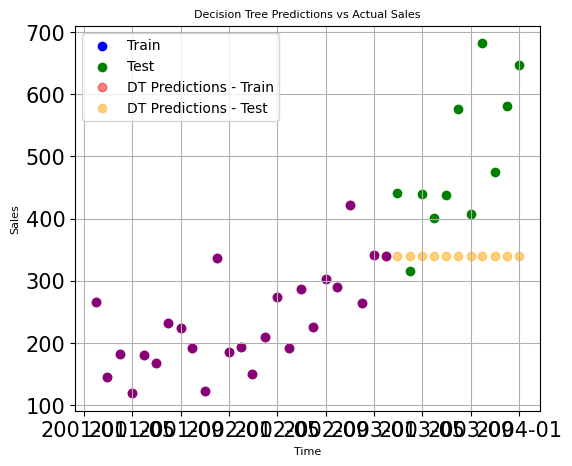

In [ ]:
plt.figure(figsize=(6, 5))

# Plot training data
plt.scatter(NaiveModel_train.index, NaiveModel_train['Sales'], color='blue', label='Train')

# Plot test data
plt.scatter(NaiveModel_test.index, NaiveModel_test['Sales'], color='green', label='Test')

# Plot predictions for training data
plt.scatter(NaiveModel_train.index, dt_predictions_train, color='red', label='DT Predictions - Train', alpha=0.5)

# Plot predictions for test data
plt.scatter(NaiveModel_test.index, dt_predictions_test, color='orange', label='DT Predictions - Test', alpha=0.5)

plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Decision Tree Predictions vs Actual Sales')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Create DataFrame
results_data = {
    'Model': ['RegressionOnTime', 'Naive Model', 'Decision Tree', 'Random Forest'],
    'Test RMSE': [164.563, 186.469, 186.4691, 189.899],
    'Test MAPE': [27.94, 31.72, 28.741, 29.398536993612996]
}

results_df = pd.DataFrame(results_data)

# Set 'Model' column as index
results_df.set_index('Model', inplace=True)

# Display results
print(results_df)


                  Test RMSE  Test MAPE
Model                                 
RegressionOnTime   164.5630  27.940000
Naive Model        186.4690  31.720000
Decision Tree      186.4691  28.741000
Random Forest      189.8990  29.398537


Considering both RMSE and MAPE, the RegressionOnTime Model has the lowest RMSE and MAPE values on the test data, indicating better performance compared to the other models.